In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size =(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

generated_inputs = np.column_stack((xs,zs))
noise = np.random.uniform(-1,1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro',inputs=generated_inputs,targets=generated_targets)

In [3]:
training_data = np.load('TF_intro.npz')

In [6]:
input_size = 2
output_size = 1

# Determining the model
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                            kernel_initializer = tf.random_uniform_initializer(minval=-0.10,maxval=0.10),
                            bias_initializer = tf.random_uniform_initializer(minval=-0.10,maxval=0.10))
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

#model.compile(optimizer = custom_optimizer,loss='mean_squared_error')
model.compile(optimizer = custom_optimizer,loss='huber_loss')

#early_stopping = tf.keras.callbacks.EarlyStopping(monitor='huber_loss',patience=2)
model.fit(training_data['inputs'], training_data['targets'], epochs = 200, verbose =2 ) 

Train on 1000 samples
Epoch 1/200
1000/1000 - 0s - loss: 16.4948
Epoch 2/200
1000/1000 - 0s - loss: 15.7990
Epoch 3/200
1000/1000 - 0s - loss: 15.1025
Epoch 4/200
1000/1000 - 0s - loss: 14.4150
Epoch 5/200
1000/1000 - 0s - loss: 13.7289
Epoch 6/200
1000/1000 - 0s - loss: 13.0457
Epoch 7/200
1000/1000 - 0s - loss: 12.3728
Epoch 8/200
1000/1000 - 0s - loss: 11.7132
Epoch 9/200
1000/1000 - 0s - loss: 11.0570
Epoch 10/200
1000/1000 - 0s - loss: 10.4094
Epoch 11/200
1000/1000 - 0s - loss: 9.7838
Epoch 12/200
1000/1000 - 0s - loss: 9.1600
Epoch 13/200
1000/1000 - 0s - loss: 8.5552
Epoch 14/200
1000/1000 - 0s - loss: 7.9670
Epoch 15/200
1000/1000 - 0s - loss: 7.4067
Epoch 16/200
1000/1000 - 0s - loss: 6.8875
Epoch 17/200
1000/1000 - 0s - loss: 6.3935
Epoch 18/200
1000/1000 - 0s - loss: 5.9482
Epoch 19/200
1000/1000 - 0s - loss: 5.5513
Epoch 20/200
1000/1000 - 0s - loss: 5.2076
Epoch 21/200
1000/1000 - 0s - loss: 4.9218
Epoch 22/200
1000/1000 - 0s - loss: 4.6896
Epoch 23/200
1000/1000 - 0s - l

In [7]:
# getting the weights and biases
model.layers[0].get_weights()

[array([[ 1.998823 ],
        [-2.9950602]], dtype=float32),
 array([4.752509], dtype=float32)]

In [9]:
val = model.predict_on_batch(training_data['inputs'])
#np.array(val).round(1)

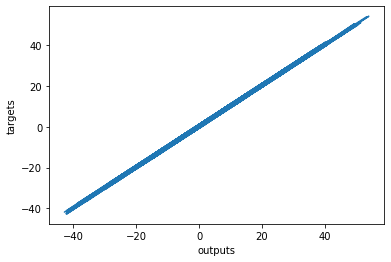

In [10]:
plt.plot(np.squeeze(val),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

In [9]:
val[1:10]

<tf.Tensor: id=13280, shape=(9, 1), dtype=float32, numpy=
array([[ 11.188388 ],
       [ 17.189762 ],
       [  4.6526413],
       [-24.727163 ],
       [ -6.267474 ],
       [ 26.62956  ],
       [ 26.386436 ],
       [  9.3839245],
       [ 38.775208 ]], dtype=float32)>